In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('city_united.csv') # загружаем данные
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [3]:
df[df.duplicated('Quality of Life Index')]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
25,Seattle,Washington,North America,2.2910,3.790,8.3670,7.551,2.8845,4.52375,8.671,...,6.309667,5.7145,7.56025,6.5145,4.7720,4.9405,8.1155,8.0895,7.2095,177.14
39,Portland,Oregon,North America,4.1380,4.924,6.9570,5.899,2.2405,4.90800,8.671,...,6.317667,4.2155,8.45950,6.5145,3.9205,5.9685,6.2195,8.1595,6.3040,172.41
109,Birmingham,Alabama,North America,6.5555,5.133,4.3575,1.000,1.4355,2.02075,8.671,...,6.541000,3.6245,7.03750,6.5145,4.2040,5.1605,5.3835,4.8815,1.2660,141.82


<AxesSubplot:xlabel='Quality of Life Index', ylabel='Count'>

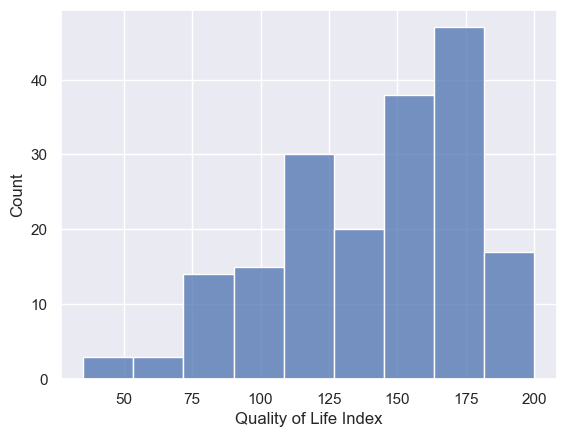

In [4]:
sns.histplot(data=df, x='Quality of Life Index') #посмотрим распределение

In [5]:
columns_v = [
 'Housing',
 'Cost of Living',
 'Startups',
 'Venture Capital',
 'Travel Connectivity',
 'Commute',
 'Business Freedom',
 'Safety',
 'Healthcare',
 'Education',
 'Environmental Quality',
 'Economy',
 'Taxation',
 'Internet Access',
 'Leisure & Culture',
 'Tolerance',
 'Outdoors']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lin_model = LinearRegression()
df_lin = df.copy()
x = df_lin[columns_v]    # независимые переменные
y = df_lin[['Quality of Life Index']]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.7517204327023537


In [7]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [8]:
from math import factorial
shaply = {}
for i in range(len(columns_v)):   
    S = list(powerset(columns_v[:i] + columns_v[i+1:]))    # все подмножества признаков без i
    f_i = LinearRegression().fit(x_train, y_train)
    f_ = LinearRegression().fit(x_train[list(x_train.columns[:i]) + list(x_train.columns[i+1:])], y_train)
    # f_i - обучение модели с i-тым признаком        
    # f_ - без i
    r2_i = f_i.score(x_train, y_train)
    r2_ = f_.score(x_train[list(x_train.columns[:i]) + list(x_train.columns[i+1:])], y_train)
    summ = 0
    for s in S:
        n = (factorial(len(s)) * factorial(len(columns_v) + len(s) - 1)) / factorial(len(columns_v))
        summ += n * (r2_i - r2_-i)
    shaply[columns_v[i]] = summ

In [9]:
sorted(shaply.items(), key=lambda x:x[1], reverse=True)

[('Housing', 1.4829218585131995e+30),
 ('Cost of Living', -1.596728286178704e+34),
 ('Startups', -3.186417590304342e+34),
 ('Venture Capital', -4.781476131289794e+34),
 ('Travel Connectivity', -6.385517885389853e+34),
 ('Commute', -7.984217104592942e+34),
 ('Business Freedom', -9.554226681014102e+34),
 ('Safety', -1.1177732190102498e+35),
 ('Healthcare', -1.2764211507585036e+35),
 ('Education', -1.4351574646939812e+35),
 ('Environmental Quality', -1.583952807584076e+35),
 ('Economy', -1.7553275238973894e+35),
 ('Taxation', -1.9162899632531483e+35),
 ('Internet Access', -2.0756880815865414e+35),
 ('Leisure & Culture', -2.2355783908880787e+35),
 ('Tolerance', -2.394063972540151e+35),
 ('Outdoors', -2.5534633225111726e+35)]

In [10]:
# Вычисление матрицы корреляции между признаками и целевой переменной
correlation_matrix = df.corr()
correlation_matrix

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
Housing,1.000000,0.835347,-0.422283,-0.544934,-0.293691,0.053321,-0.592694,0.104502,-0.312218,-0.671270,-0.491254,-0.599117,0.040601,-0.327728,-0.151449,-0.218272,-0.265239,-0.478766
Cost of Living,0.835347,1.000000,-0.189456,-0.335346,-0.252162,0.009023,-0.729812,0.082542,-0.549788,-0.669702,-0.644051,-0.535714,0.065482,-0.387081,-0.080400,-0.365935,-0.194239,-0.641829
Startups,-0.422283,-0.189456,1.000000,0.768533,0.314257,-0.073944,0.200689,-0.153074,-0.105327,0.404855,0.038782,0.324143,-0.144869,0.151026,0.409144,-0.107459,0.246338,0.030528
Venture Capital,-0.544934,-0.335346,0.768533,1.000000,0.402359,-0.013279,0.267846,-0.115365,0.053052,0.587541,0.140074,0.409377,-0.206106,0.255171,0.328845,-0.104768,0.263502,0.140675
Travel Connectivity,-0.293691,-0.252162,0.314257,0.402359,1.000000,0.295973,0.166225,0.212772,0.318817,0.408567,0.042237,0.023553,-0.224209,0.233218,0.317767,-0.059592,0.129325,0.032186
Commute,0.053321,0.009023,-0.073944,-0.013279,0.295973,1.000000,0.184565,0.479003,0.422486,0.267287,0.221469,-0.086909,0.079615,0.163643,0.013701,0.374769,0.017985,0.180045
Business Freedom,-0.592694,-0.729812,0.200689,0.267846,0.166225,0.184565,1.000000,-0.040784,0.604082,0.726906,0.758425,0.628362,0.035933,0.481307,0.045940,0.428412,0.121911,0.794824
Safety,0.104502,0.082542,-0.153074,-0.115365,0.212772,0.479003,-0.040784,1.000000,0.289060,0.033296,0.073815,-0.213350,0.377007,0.003953,-0.082529,0.314483,0.029502,-0.013056
Healthcare,-0.312218,-0.549788,-0.105327,0.053052,0.318817,0.422486,0.604082,0.289060,1.000000,0.575393,0.574848,0.167774,-0.013104,0.321687,0.101435,0.519850,0.069250,0.586219
Education,-0.671270,-0.669702,0.404855,0.587541,0.408567,0.267287,0.726906,0.033296,0.575393,1.000000,0.595425,0.525027,-0.114879,0.500145,0.253026,0.267459,0.205798,0.566568


In [11]:
# Вывод коэффициентов корреляции с целевой переменной
target_correlation = correlation_matrix['Quality of Life Index'].drop('Quality of Life Index')
target_correlation

Housing                 -0.478766
Cost of Living          -0.641829
Startups                 0.030528
Venture Capital          0.140675
Travel Connectivity      0.032186
Commute                  0.180045
Business Freedom         0.794824
Safety                  -0.013056
Healthcare               0.586219
Education                0.566568
Environmental Quality    0.870059
Economy                  0.517052
Taxation                -0.003578
Internet Access          0.501163
Leisure & Culture       -0.121776
Tolerance                0.487042
Outdoors                 0.005157
Name: Quality of Life Index, dtype: float64

In [12]:
# Отбор признаков с высокой корреляцией
significant_features = target_correlation[abs(target_correlation) > 0.5]

print(significant_features)

Cost of Living          -0.641829
Business Freedom         0.794824
Healthcare               0.586219
Education                0.566568
Environmental Quality    0.870059
Economy                  0.517052
Internet Access          0.501163
Name: Quality of Life Index, dtype: float64
